# 기존의 빵 판매량을 이용하여 추후 판매량을 예측하는 프로그램

## 작업처리 순서
- 데이터가 정리된 빵 판매량 파일을 로드
- 빵 판매량 파일에서 트레이닝 데이터를 추출
- 추출한 트레이닝 데이터를 이용해 모델링 진행
- 빵 판매량 파일에서 테스트 데이터를 추출
- 모델링 검증
- 데이터 시각화

## 모델링 조건
- 트레이닝 데이터 : 테스트 데이터 = 70 : 30

## 데이터 정보
- 실제로 영업하면서 쓰인 데이터를 이용함 [다운로드 링크](https://drive.google.com/open?id=0Byo6yQd8LvDzVFVyUjZsVjhMaWc)

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

필요한 모듈 임포트

In [2]:
productSellData = pd.read_csv("productSell.csv", index_col=0)

판매량을 정리한 csv파일을 불러온다

In [3]:
print("* productSellData.head()", productSellData.head(), sep="\n", end="\n\n")

* productSellData.head()
             productSell  expectProductSell  year  month  day  dayOfTheWeek  \
productCode                                                                   
312701                43                NaN  2016     11    1             3   
312701                49                NaN  2016     11    2             4   
312701                52                NaN  2016     11    3             5   
312701                45                NaN  2016     11    4             6   
312701                57                NaN  2016     11    5             7   

             week  
productCode        
312701          1  
312701          1  
312701          1  
312701          1  
312701          1  



빵 판매량이 기록된 전체 데이터가 잘 불러왔는지 테스트 할 겸 윗부분만 출력

In [4]:
print("* productSellData.tail()", productSellData.tail(), sep="\n", end="\n\n")

* productSellData.tail()
             productSell  expectProductSell  year  month  day  dayOfTheWeek  \
productCode                                                                   
312708                26                NaN  2017      1   27             6   
312708                 0                NaN  2017      1   28             7   
312708                 0                NaN  2017      1   29             1   
312708                 5                NaN  2017      1   30             2   
312708                31                NaN  2017      1   31             3   

             week  
productCode        
312708         13  
312708         13  
312708         14  
312708         14  
312708         14  



빵 판매량이 기록된 전체 데이터가 잘 불러왔는지 테스트 할 겸 아랫부분만 출력

In [5]:
XcoordinateTrainData = productSellData["productSell"]
XcoordinateTrainData = XcoordinateTrainData[:26]

- 트레이닝에 쓰일 데이터 중 컬럼이 판매량(productSell)인것만 로드
- 로드할 때 우리 프로젝트의 트레이닝 조건인 4주차까지만 알고리즘을 적용한다는 내용을 감안하여 26열까지만 사용
- 로드한 데이터를 모델의 독립 변수로 적용

In [6]:
print("* XcoordinateTrainData.head()", XcoordinateTrainData.head(), sep="\n", end="\n\n")

* XcoordinateTrainData.head()
productCode
312701    43
312701    49
312701    52
312701    45
312701    57
Name: productSell, dtype: int64



독립변수로 쓰일 데이터(productSell)이 잘 불러와졌는지 윗부분만 테스트 출력

In [7]:
print("* XcoordinateTrainData.tail()", XcoordinateTrainData.tail(), sep="\n", end="\n\n")

* XcoordinateTrainData.tail()
productCode
312701    66
312701    67
312701    54
312701    49
312701    57
Name: productSell, dtype: int64



독립변수로 쓰일 데이터(productSell)이 잘 불러와졌는지 아랫부분만 테스트 출력

In [8]:
YcoordinateTrainData = productSellData["day"]
YcoordinateTrainData = YcoordinateTrainData[:26]

- 트레이닝에 쓰일 데이터 중 컬럼이 일(day)인것만 로드
- 로드할 때 우리 프로젝트의 트레이닝 조건인 4주차까지만 알고리즘을 적용한다는 내용을 감안하여 26열까지만 사용
- 로드한 데이터를 모델의 종속 변수로 적용

In [9]:
print("* YcoordinateTrainData.head()", YcoordinateTrainData.head(), sep="\n", end="\n\n")

* YcoordinateTrainData.head()
productCode
312701    1
312701    2
312701    3
312701    4
312701    5
Name: day, dtype: int64



종속변수로 쓰일 데이터(day)가 잘 불러와졌는지 윗부분만 테스트 출력

In [10]:
print("* YcoordinateTrainData.tail()", YcoordinateTrainData.tail(), sep="\n", end="\n\n")

* YcoordinateTrainData.tail()
productCode
312701    22
312701    23
312701    24
312701    25
312701    26
Name: day, dtype: int64



종속변수로 쓰일 데이터(day)가 잘 불러와졌는지 아랫부분만 테스트 출력

In [11]:
regressionModel = linear_model.LinearRegression()

모델링할 객체 생성

In [12]:
regressionModel.fit(XcoordinateTrainData.to_frame(), YcoordinateTrainData.to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- 정확도를 최대치로 하는 회귀분석을 진행
- 진행 시 들어간 데이터로는 트레이닝용 독립변수 판매량(productSell), 종속변수 일(day)가 들어감

In [13]:
print('Coefficients: \n', regressionModel.coef_)

Coefficients: 
 [[ 0.21408458]]


모델링 진행 후 계수가 잘 구해졌는지 출력

In [14]:
XcoordinateTestData = productSellData["productSell"]
XcoordinateTestData = XcoordinateTestData[1:8]

- 테스트에 쓰일 데이터 중 컬럼이 판매량(productSell)인것만 로드
- 로드할 때 우리 프로젝트의 테스트 조건인 70:30을 감안하여 트레이닝할때 쓰인 데이터 갯수가 26개라면 테스트 데이터 갯수는 7개로 지정
- 로드한 데이터를 테스트의 독립 변수로 적용

In [15]:
print("* XcoordinateTestData.head()", XcoordinateTestData.head(), sep="\n", end="\n\n")

* XcoordinateTestData.head()
productCode
312701    49
312701    52
312701    45
312701    57
312701    31
Name: productSell, dtype: int64



독립변수로 쓰일 데이터(productSell)이 잘 불러와졌는지 윗부분만 테스트 출력

In [16]:
print("* XcoordinateTestData.tail()", XcoordinateTestData.tail(), sep="\n", end="\n\n")

* XcoordinateTestData.tail()
productCode
312701    45
312701    57
312701    31
312701    39
312701    52
Name: productSell, dtype: int64



독립변수로 쓰일 데이터(productSell)이 잘 불러와졌는지 아랫부분만 테스트 출력

In [17]:
YcoordinateTestData = productSellData["day"]
YcoordinateTestData = YcoordinateTestData[1:8]

- 테스트에 쓰일 데이터 중 컬럼이 일(day)인것만 로드
- 로드할 때 우리 프로젝트의 테스트 조건인 70:30을 감안하여 트레이닝할때 쓰인 데이터 갯수가 26개라면 테스트 데이터 갯수는 7개로 지정
- 로드한 데이터를 테스트의 종속 변수로 적용

In [18]:
print("* YcoordinateTestData.head()", YcoordinateTestData.head(), sep="\n", end="\n\n")

* YcoordinateTestData.head()
productCode
312701    2
312701    3
312701    4
312701    5
312701    6
Name: day, dtype: int64



종속변수로 쓰일 데이터(day)가 잘 불러와졌는지 윗부분만 테스트 출력

In [19]:
print("* YcoordinateTestData.tail()", YcoordinateTestData.tail(), sep="\n", end="\n\n")

* YcoordinateTestData.tail()
productCode
312701    4
312701    5
312701    6
312701    7
312701    8
Name: day, dtype: int64



종속변수로 쓰일 데이터(day)가 잘 불러와졌는지 아랫부분만 테스트 출력

In [20]:
print("Mean squared error: %.2f"
      % np.mean((regressionModel.predict(XcoordinateTestData.to_frame()) - YcoordinateTestData.to_frame()) ** 2))

Mean squared error: 64.59


실제로 예상판매량을 계산해 봄으로써 나온 결과값들을 이용해 평균 제곱근 편차를 구함

In [21]:
print('Variance score: %.2f' % regressionModel.score(XcoordinateTestData.to_frame(), YcoordinateTestData.to_frame()))

Variance score: -15.15


또한 회귀직선을 구하여 해당 그래프와 데이터들간의 분산 값을 구함

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


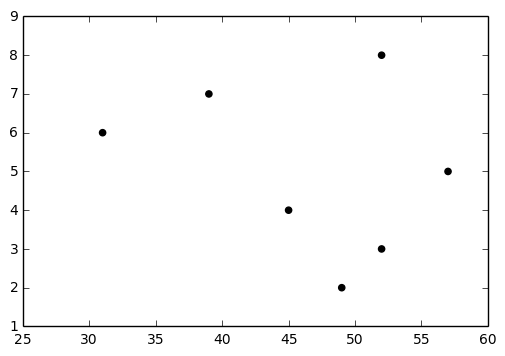

In [22]:
plt.scatter(XcoordinateTestData, YcoordinateTestData,  color='black')

테스트 데이터 시각화

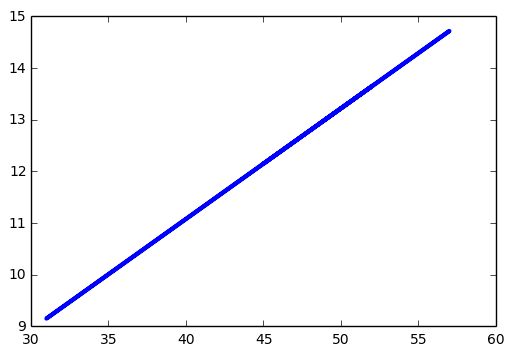

In [23]:
plt.plot(XcoordinateTestData.to_frame(), regressionModel.predict(XcoordinateTestData.to_frame()), color='blue',
         linewidth=3)

회귀직선 시각화